# <center>Laboratorium 2<br>Metody Numeryczne</center>

Biblioteki niezbędne do wykonania zadania:

In [10]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

***Zadanie 1.***  
Zdefiniuj w notatniku funkcję $f(x)= x^{3} - 3x$ i sporządź jej wykres dla argumentów z przedziału:  
1. $x\in<-1,1>$  
2. $x\in<-5,5>$  
3. $x\in<0,5>$
  
***Wskazówki***
Jako argumentu funkcji można użyć numpy array.  

Do wizualizacji wyników w Pythonie używa się pakietu [Matplotlib](https://matplotlib.org/). Działanie tego pakietu prezentuje przykład:

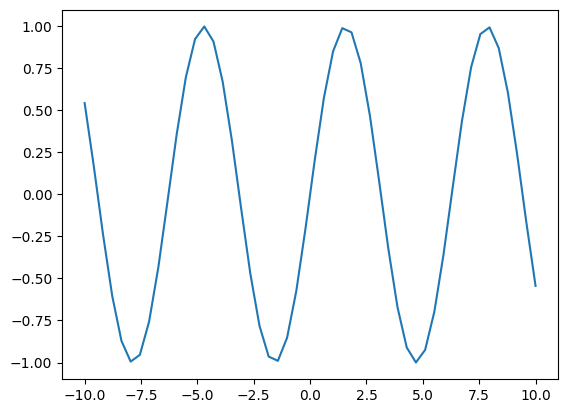

In [11]:
x = np.linspace(-10,10)
# inicjalizacja wektora f(x) = sin(x)
y = np.sin(x)
plt.plot(x, y, label ='sin(x)')
plt.show()

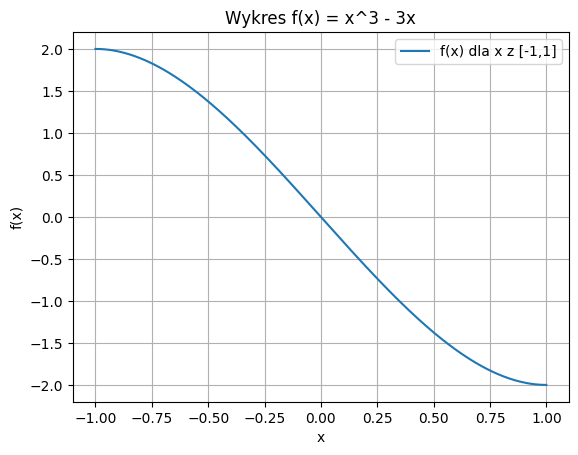

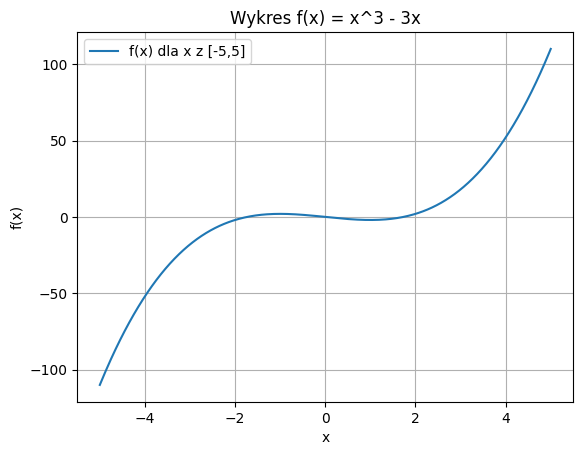

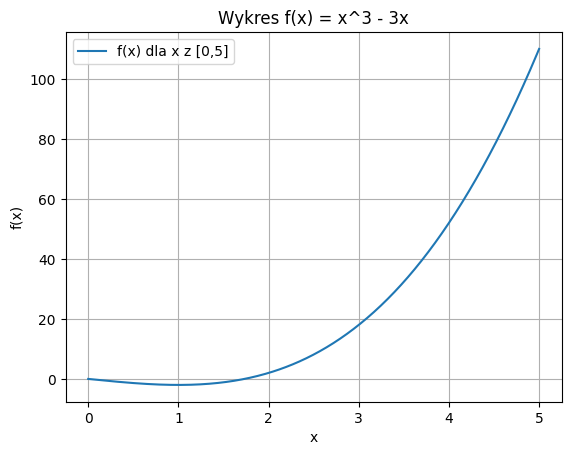

In [3]:
def f(x):
    return x**3 - 3*x

x_ranges = [np.linspace(-1, 1, 400), np.linspace(-5, 5, 400), np.linspace(0, 5, 400)]
labels = ['f(x) dla x z [-1,1]', 'f(x) dla x z [-5,5]', 'f(x) dla x z [0,5]']

for x, label in zip(x_ranges, labels):
    y = f(x)
    plt.plot(x, y, label=label)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Wykres f(x) = x^3 - 3x')
    plt.legend()
    plt.grid()
    plt.show()

Wspierając się dokumentacją [Matplotlib](https://matplotlib.org/) dodaj do wykresu etykiety osi, tytuł, grid i legendę.

***Zadanie 2.***  
Dla funkcji z zadania pierwszego używając wektora $x \in <-10,10>$ wyrysuj wykres dla argumentów:
1. $x\in<-1,1>$  
2. $x\in<-10,-1>$  
3. $x\in<1,10>$

Używając do tego funkcji: [ylim](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.ylim.html), [xlim](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.xlim.html), [axis](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.axis.html)

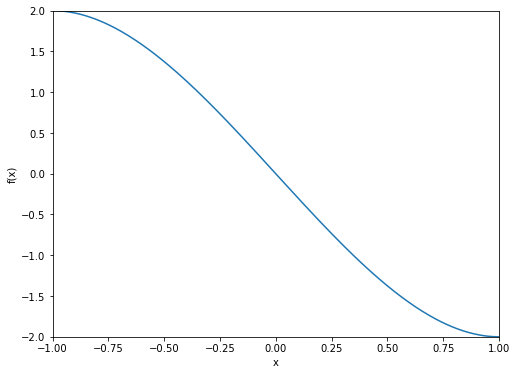

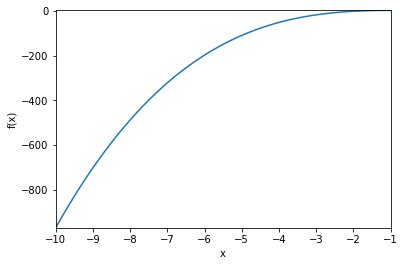

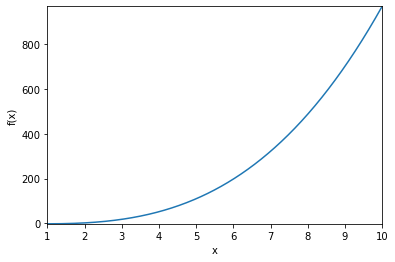

In [28]:
x_ranges = [np.linspace(-1, 1, 400), np.linspace(-10, -1, 400), np.linspace(1, 10, 400)]
labels = ['f(x) dla x z [-1, 1]', 'f(x) dla x z [-10, -1]', 'f(x) dla x z [1, 10]']

plt.figure(figsize=(8, 6))

for x, label in zip(x_ranges, labels):
    y = f(x)
    plt.plot(x, y, label=label)
    plt.xlim(x.min(), x.max())
    plt.ylim(y.min(), y.max())
    plt.xlabel('x')
    plt.ylabel('f(x)') 
    plt.show() 

***Zadanie 3.*** 
Oblicz ilość ciepła, które wydzieli się podczas hamowania jeżeli opisuje je zależność:  
  
$Q = \cfrac{mv^2}{2}$  
  
jeżeli $m = 2500g$, $v = 60km/h$, wypisz wynik oraz podaj w kilokaloriach i dżulach. Wykreśl wykresy które zobrazują zmianę ilości ciepła w procesie hamowania dla ciała o masie $3000g$ i prędkości $v\in<200,0>km/h$, przedstawiając ciepło hamowania na pierwszym w skali liniowej na drugim w skali logarytmicznej.  

***Wsakzówka:*** Do stworzenia wykresów z osią logarytmiczną skorzystaj z funkcji: [semilogy](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.semilogy.html), [xlim](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlim.html?highlight=xlim#matplotlib.pyplot.xlim) i [figure](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html?highlight=figure#matplotlib.pyplot.figure) z pakietu *Matplotlib*. 

Ciepło wydzielone przy hamowaniu (dla 2500 g, 60 km/h):
Q = 347.22 J = 0.082988 kcal


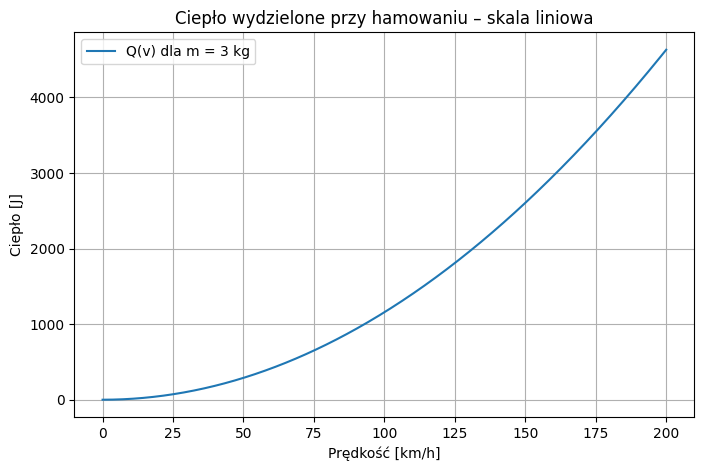

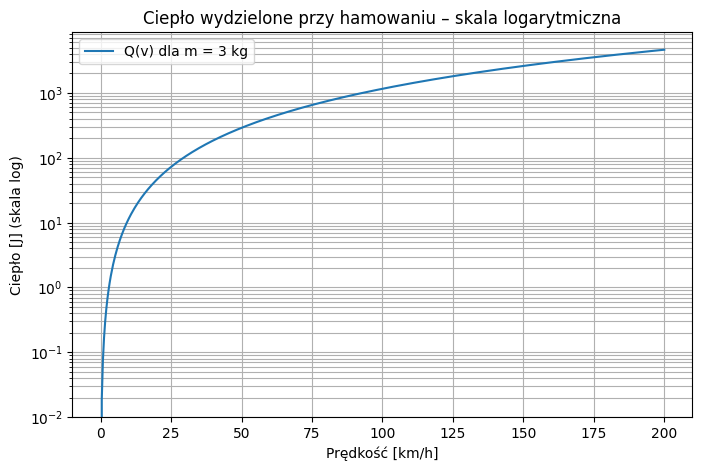

In [4]:
m1 = 2500 / 1000      
v1 = 60 * 1000 / 3600

def Q(m, v):
    return (m * v**2) / 2 

Q_joule = Q(m1, v1)
Q_kcal = Q_joule / 4184  # 1 kcal = 4184 J

print(f"Ciepło wydzielone przy hamowaniu (dla 2500 g, 60 km/h):")
print(f"Q = {Q_joule:.2f} J = {Q_kcal:.6f} kcal")

m2 = 3000 / 1000       
v = np.linspace(0, 200, 500) * 1000 / 3600 
Q_values = Q(m2, v)

plt.figure(figsize=(8,5))
plt.plot(v * 3.6, Q_values, label='Q(v) dla m = 3 kg')
plt.xlabel('Prędkość [km/h]')
plt.ylabel('Ciepło [J]')
plt.title('Ciepło wydzielone przy hamowaniu – skala liniowa')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.semilogy(v * 3.6, Q_values, label='Q(v) dla m = 3 kg')
plt.xlabel('Prędkość [km/h]')
plt.ylabel('Ciepło [J] (skala log)')
plt.title('Ciepło wydzielone przy hamowaniu – skala logarytmiczna')
plt.grid(True, which="both")
plt.legend()
plt.show()

***Zadanie 4.***  
Częstą praktyką szczególnie w dziedzinie analizy danych, statystyce, uczeniu maszynowym, itp. jest tworzenie na podstawie biblioteki [Matplotlib](https://matplotlib.org/) własnych szablonów wykresów stworzonych na podstawie funkcji. Najprostszy przykład to przeładowanie funkcji plot tak by wykres miał czerwony kolor:

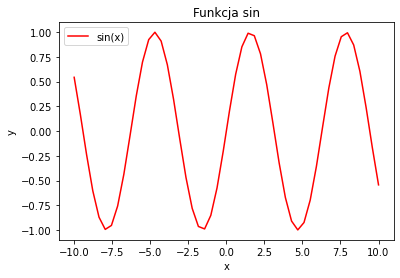

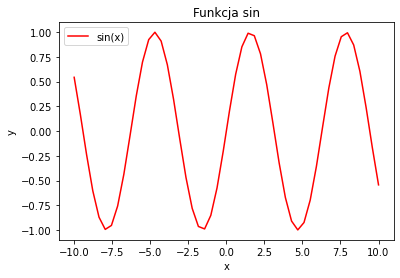

In [16]:
def my_plot(x,y,xlabel,ylabel,title,label):
    if x.shape != y.shape or  min(x.shape)==0:
        return None
    fig, ax = plt.subplots()
    ax.plot(x, y, 'r', label=label)
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)
    ax.legend()
    return fig

x = np.linspace(-10,10)
# inicjalizacja wektora f(x) = sin(x)
y = np.sin(x)
my_plot(x,y,'x','y','Funkcja sin', 'sin(x)')

Zaimplementuj funkcję *compare_plot* tak, aby na jednym wykresie zostały narysowane dwie serie danych za pomocą metody [plot](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot).  

- Pierwsza seria powinna być rysowana kolorem **niebieskim** z grubością linii równą `4`.  
- Druga seria powinna być rysowana kolorem **czerwonym** z grubością linii równą `2`.  

Domyślnie wykres powinien zawierać **legendę**.  
Dodatkowo użytkownik powinien mieć możliwość ustawienia następujących parametrów:
- x1 - wektor wartości osi x dla pierwszego wykresu,
- y1 - wektor wartości osi y dla pierwszego wykresu,
- x2 - wektor wartości osi x dla drugiego wykresu,
- y2 - wektor wartości osi x dla drugiego wykresu,
- xlabel - opis osi x,
- ylabel - opis osi y,
- title - tytuł wykresu ,
- label1 - nazwa serii z pierwszego wykresu,
- label2 - nazwa serii z drugiego wykresu.

Jeżeli nie da się wyrysować danych należy zwrócić wartość None.

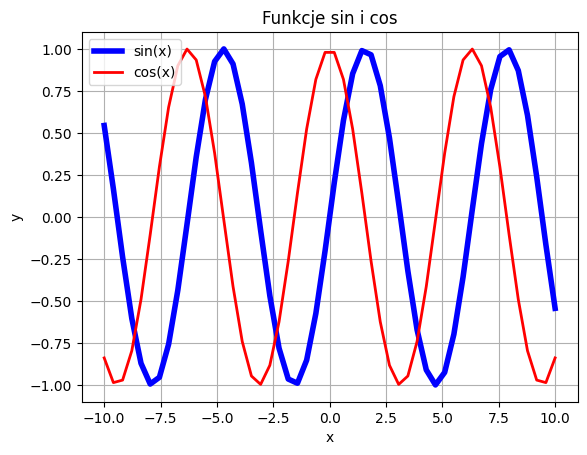

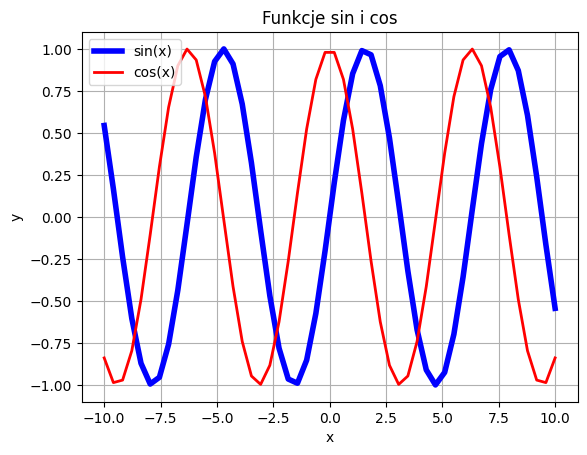

In [ ]:
def compare_plot(x1, y1, x2, y2, xlabel, ylabel, title, label1, label2):
    # Sprawdzenie poprawności danych
    if (x1.shape != y1.shape or x2.shape != y2.shape or
        min(x1.shape) == 0 or min(x2.shape) == 0):
        return None

    # Tworzenie obiektu wykresu
    fig, ax = plt.subplots()

    # Pierwsza seria – niebieska linia, grubość 4
    ax.plot(x1, y1, color='blue', linewidth=4, label=label1)

    # Druga seria – czerwona linia, grubość 2
    ax.plot(x2, y2, color='red', linewidth=2, label=label2)

    # Ustawienia wykresu
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)
    ax.legend()
    ax.grid(True)

    return fig

x = np.linspace(-10,10)
y1 = np.sin(x)
y2 = np.cos(x)  
compare_plot(x, y1, x, y2, 'x', 'y', 'Funkcje sin i cos', 'sin(x)', 'cos(x)')
    

***Zadanie 5***  
Za pomocą funkcji *compare\_plot* rozwiąż graficznie równanie: $f(x) = g(x)$, gdzie:  
$f(x) = x+2$  
$g(x) = x^2 -2sin(x) + 3$

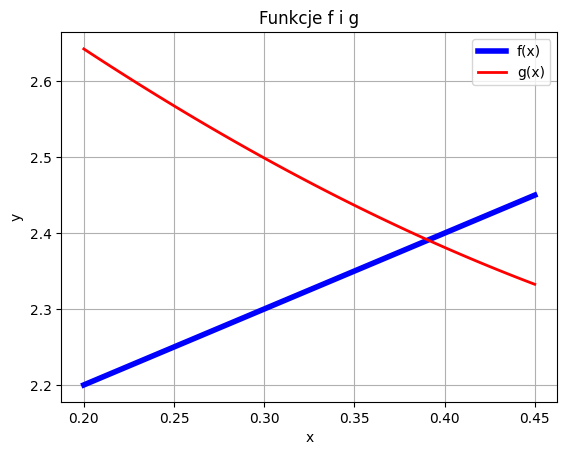

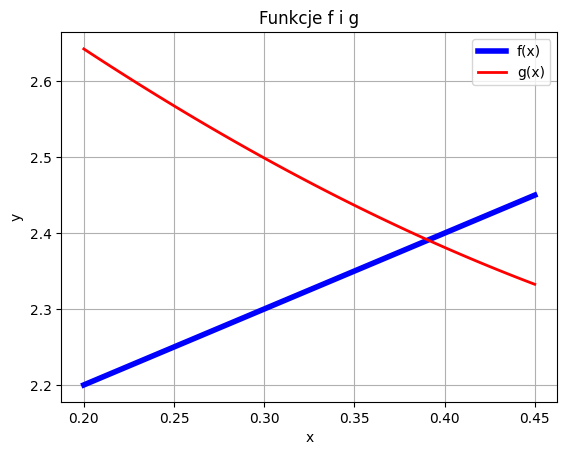

In [18]:
def f(x):
    return x + 2
def g(x):
    return x**2 -2* np.sin(x) + 3

x = np.linspace(0.2,0.45)
compare_plot(x, f(x), x , g(x), 'x', 'y', 'Funkcje f i g', 'f(x)', 'g(x)')

***Zadanie 6.***   
Innym przydatnym sposobem prezentowania wykresów jest [subplot](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.subplot.html), czyli wyrysowanie obok siebie kilku wykresów. Zaimplementuj funkcję parallel_plot tak by obok siebie wyrysowane zostały dwa standardowe ploty i użytkownik mógł podać parametry:
- x1 - wektor wartości osi x dla pierwszego wykresu,
- y1 - wektor wartości osi y dla pierwszego wykresu,
- x2 - wektor wartości osi x dla drugiego wykresu,
- y2 - wektor wartości osi x dla drugiego wykresu,
- x1label - opis osi x dla pierwszego wykresu,
- y1label - opis osi y dla pierwszego wykresu,
- x2label - opis osi x dla drugiego wykresu,
- y2label - opis osi y dla drugiego wykresu,
- title - tytuł wykresu,
- orientation - parametr przyjmujący wartość '-' jeżeli subplot ma posiadać dwa wiersze albo '|' jeżeli ma posiadać dwie kolumny.

Jeżeli nie da się wyrysować danych należy zwrócić wartość None.

 

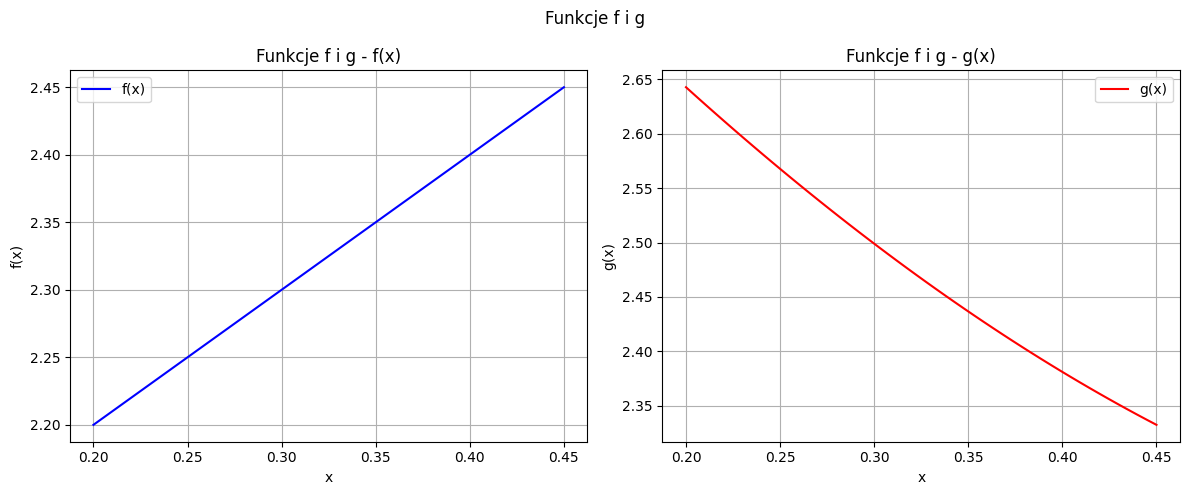

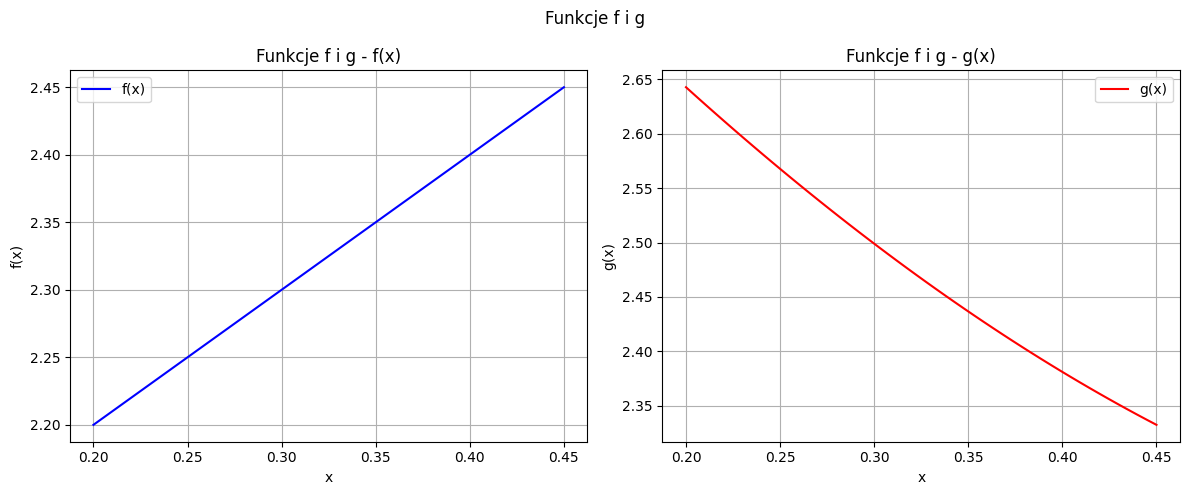

In [ ]:

def parallel_plot(x1, y1, x2, y2, x1label, y1label, x2label, y2label, title, orientation=None):
    if (x1.shape != y1.shape or x2.shape != y2.shape or
        min(x1.shape) == 0 or min(x2.shape) == 0):
        return None
    
    if (
    len(x1) != len(y1)
    or len(x2) != len(y2)
    or len(x1) == 0
    or len(x2) == 0
    or len(x1) != len(x2) 
    ):
        return None

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.plot(x1, y1, 'b', label=y1label)
    ax1.set(xlabel=x1label, ylabel=y1label)
    ax1.set_title(f'{title} - {y1label}')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(x2, y2, 'r', label=y2label)
    ax2.set(xlabel=x2label, ylabel=y2label)
    ax2.set_title(f'{title} - {y2label}')
    ax2.legend()
    ax2.grid(True)

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

    return fig


***Zadanie 7.***  
Skorzystaj z funkcji *parallel_plot* i utwórz dwa wykresy:  
- na pierwszym przedstaw [spiralę logarytmiczną](https://pl.wikipedia.org/wiki/Spirala_logarytmiczna) w szerokim zakresie wartości,  
- na drugim zaprezentuj jej przebieg w pobliżu zera.


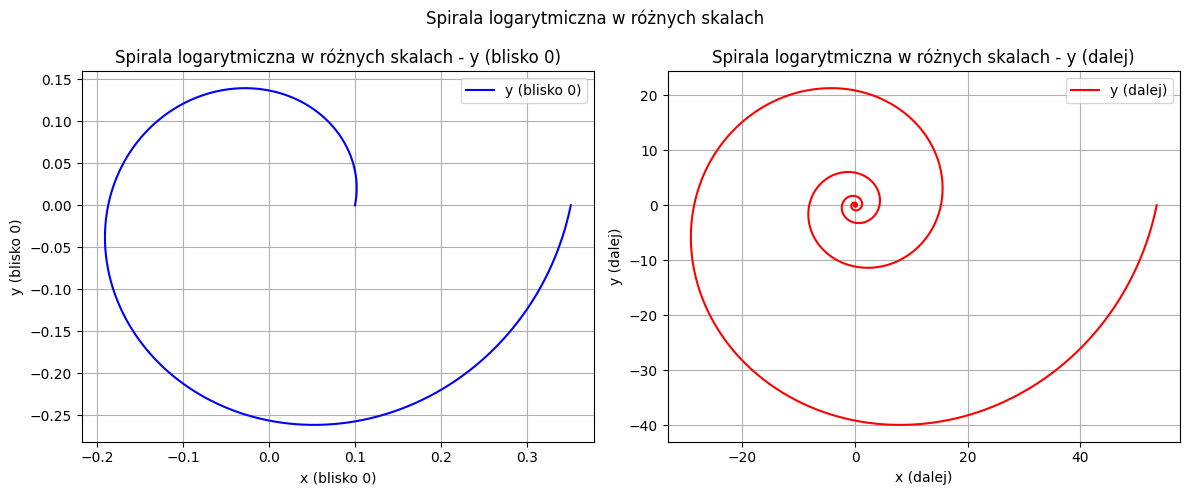

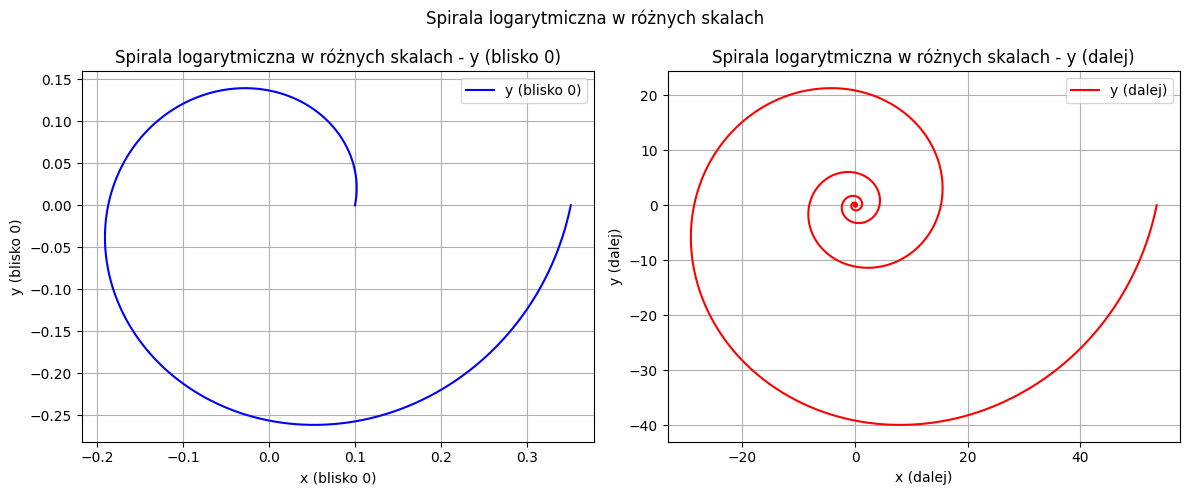

In [27]:

# Parametry spirali
a = 0.1
b = 0.2

# Kąty
theta_far = np.linspace(0, 10*np.pi, 1000)  # duży zakres
theta_near = np.linspace(0, 2*np.pi, 1000)  # blisko zera

# Promienie
r_far = a * np.exp(b * theta_far)
r_near = a * np.exp(b * theta_near)

# Konwersja na współrzędne kartezjańskie
x_far = r_far * np.cos(theta_far)
y_far = r_far * np.sin(theta_far)

x_near = r_near * np.cos(theta_near)
y_near = r_near * np.sin(theta_near)

# Rysowanie
parallel_plot(
    x_near, y_near, x_far, y_far,
    x1label='x (blisko 0)', y1label='y (blisko 0)',
    x2label='x (dalej)', y2label='y (dalej)',
    title='Spirala logarytmiczna w różnych skalach'
)


***Zadanie 8.***  
Zaimplementuj funkcję *log\_plot* która będzie tworzyć wykres w skalach logaritmicznych. Skale logarytmiczne mają być ustawione zgodnie z parameterem *log\_axis* gdzie wartość:
- 'x' oznacza skale logarytmiczną na osi x,
- 'y' oznacza skale logarytmiczną na osi y,
- 'xy' oznacza skale logarytmiczną na obu osiach.

Dodatkowo użytkownik ma mieć możliwość ustawienia parametrów:
- x - wektor wartości osi x,
- y - wektor wartości osi y,
- xlabel - opis osi x,
- ylabel - opis osi y,
- title - tytuł wykresu.

In [28]:
def log_plot(x:np.ndarray,y:np.ndarray,xlabel:np.ndarray,ylabel:str,title:str,log_axis:str):
    if x.shape != y.shape or min(x.shape)==0:
        return None
    fig, ax = plt.subplots()
    ax.plot(x, y, 'g', label=ylabel)
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)
    ax.legend()
    if log_axis == 'x':
        ax.set_xscale('log')
    elif log_axis == 'y':
        ax.set_yscale('log')
    elif log_axis == 'xy':
        ax.set_xscale('log')
        ax.set_yscale('log')
    return fig

**Zadanie 9.**  
Wykorzystaj funkcję *log_plot*, aby ponownie zilustrować wyniki z Zadania 3.  
Przedstaw na wykresach różne warianty funkcji opisującej ilość ciepła podczas hamowania, korzystając z logarytmicznych skal osi (`'x'`, `'y'`, `'xy'`).

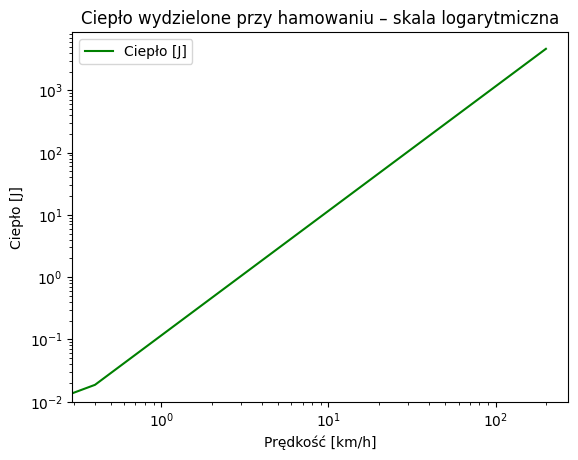

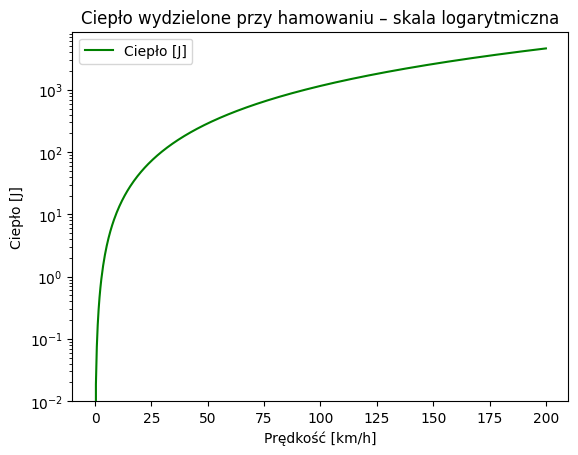

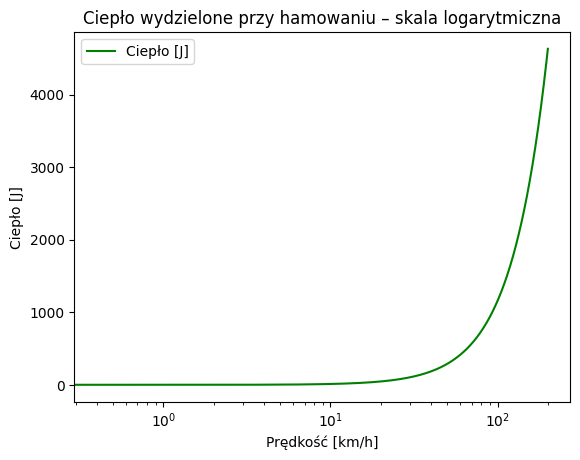

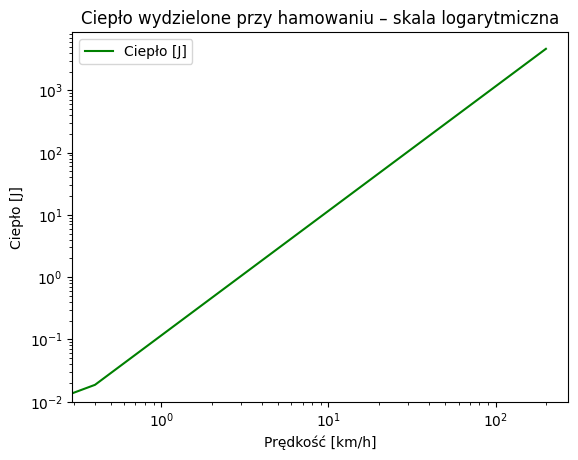

In [31]:

log_plot(v * 3.6, Q_values, 'Prędkość [km/h]', 'Ciepło [J]', 'Ciepło wydzielone przy hamowaniu – skala logarytmiczna', 'y')
log_plot(v * 3.6, Q_values, 'Prędkość [km/h]', 'Ciepło [J]', 'Ciepło wydzielone przy hamowaniu – skala logarytmiczna', 'x')
log_plot(v * 3.6, Q_values, 'Prędkość [km/h]', 'Ciepło [J]', 'Ciepło wydzielone przy hamowaniu – skala logarytmiczna', 'xy')

**Zadanie 10.**  
Skorzystaj z funkcji *semilogx*, aby narysować wykres funkcji  
$$
f(x) = \cos\bigl(2\pi x\bigr)
$$
w zakresie od co najmniej $-10^2$ do $10^0$.  

Do wygenerowania wartości funkcji użyj trzech różnych kroków:  
- pierwszy krok około `0.02`,  
- dwa pozostałe nieznacznie większe.  

***Wartości wygeneruj przy pomocy *np.arange*.***  

Narysuj wykresy według schematu:  
- węzły (punkty, w których obliczono wartości funkcji) oznacz kropkami,  
- połącz je liniami przerywanymi.  

Zaobserwuj, jak zmienia się kształt wykresu przy zwiększaniu kroku.  
Dla porównania przygotuj również wykres bez zastosowania skali logarytmicznej.  

Całość umieść w układzie siatki `2x2` przy użyciu *subplot*.  
Nie zapomnij o dodaniu tytułów osi oraz poszczególnych wykresów.


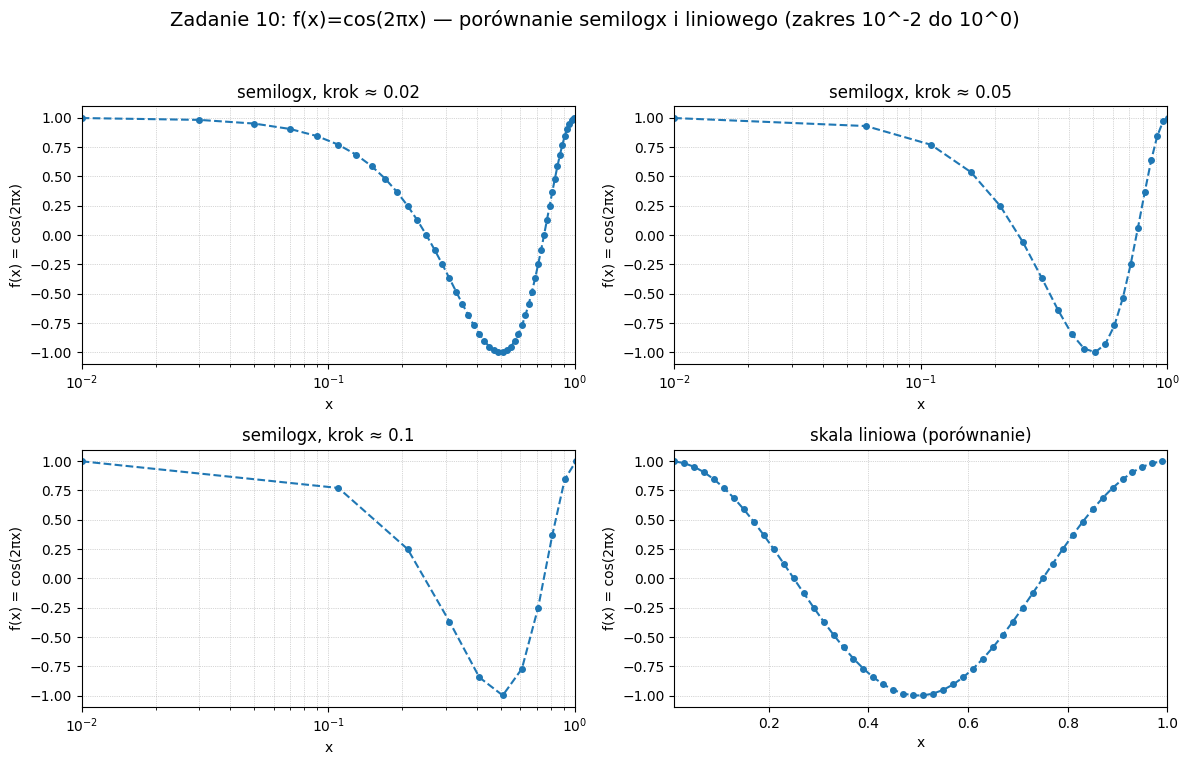

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.cos(2 * np.pi * x)

xmin, xmax = 1e-2, 1e0

steps = [0.02, 0.05, 0.1]

x_sets = [np.arange(xmin, xmax + step/2, step) for step in steps]
y_sets = [f(x) for x in x_sets]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, (x, y) in enumerate(zip(x_sets, y_sets)):
    ax = axes[i]
    ax.semilogx(x, y, marker='o', linestyle='--', markersize=4)
    ax.set_title(f"semilogx, krok ≈ {steps[i]}")
    ax.set_xlabel("x")
    ax.set_ylabel("f(x) = cos(2πx)")
    ax.grid(True, which='both', linestyle=':', linewidth=0.5)
    ax.set_xlim(xmin, xmax)

ax = axes[3]
x_lin = np.arange(xmin, xmax + steps[0]/2, steps[0])
ax.plot(x_lin, f(x_lin), marker='o', linestyle='--', markersize=4)
ax.set_title("skala liniowa (porównanie)")
ax.set_xlabel("x")
ax.set_ylabel("f(x) = cos(2πx)")
ax.grid(True, linestyle=':', linewidth=0.5)
ax.set_xlim(xmin, xmax)

fig.suptitle("Zadanie 10: f(x)=cos(2πx) — porównanie semilogx i liniowego (zakres 10^-2 do 10^0)", fontsize=14)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()



Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)